# NLTK Book - Chapter 1

[http://www.nltk.org/book/ch01.html](http://www.nltk.org/book/ch01.html)

## Section 1

This section mostly covers some very basic python/nltk functions and how to use and define functions in the interpreter. Here are many of the methods in this section.

* `Text.concordance(string)` - a method used to view a string as it is used in the text. It takes a small snippet of the text surrounding the word.
* `Text.similiar(string)` - used to collect words in the text that are used in a similar way to the string passed in - so I passed "affection" to similar on "Sense and Sensibility" and got back words like: attention, regard, marianne, kindness, etc.
* `Text.common_contexts(tuple)` - used to find contexts that are similar - so in "Sense and Sensibility" passing in "monstrous" and "very" gets back "a_pretty", "am_glad", "a_lucky" etc.
* `Text.dispersion_plot(tuple)` - plots the use of the words passed in based on offset from the beginning of the text like the following.

In [1]:
%matplotlib inline
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


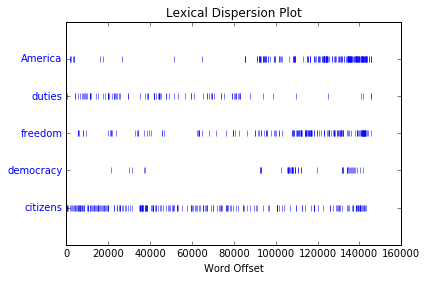

In [2]:
text4.dispersion_plot(['America', 'duties', 'freedom', 'democracy', 'citizens'])

* `len(Text)` - will return the number of tokens in the text, this includes words and punctuation.
* `set(Text)` - returns a set of tokens, so the complete vocabulary of the text. This includes punctuation, it is useful to combine this with len(set(Text)) to count the size of the vocabulary.
* `sorted(Text)` - will return all of the tokens in the Text, but alphabetically.
* `Text.count(string)` - will return a count of instances of that token.

There is a concept of lexical diversity - which relates to how frequently words are repeated. You can get this value by calculating:
* `len(set(Text)) / len(Text)`

## Section 2

This goes over a little bit about python lists covering primitive creation, concatenation, and appending. Note that python uses append instead of push, but they have the same function. The methods `count` and `index` can be used on lists as well as using bracket notation to return the value at an index.

Python also comes with some very strong slicing which can return all the values between two indexes like the following

In [3]:
text1[1230:1235]

['bruise', '."', '--', 'KING', 'HENRY']

In [4]:
text1[:10]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

In [5]:
text1[260815:]

['found', 'another', 'orphan', '.']

In [6]:
text1[-4:]

['found', 'another', 'orphan', '.']

we can modify lists by setting values to a slice like so - notice that it does removes more than it replaced in the following example, this not only adds the list on the right starting at index 4, but removes the previous values between 4 and 8

In [7]:
test = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten']
test[4:8] = ['test1', 'test2']
test

['one', 'two', 'three', 'four', 'test1', 'test2', 'nine', 'ten']

Slicing and indexing can also be done to strings like so: `"mouse"[1:3]` which yeilds `"ou"` Also note that the join method is on strings and works backward from many other languages like so:

In [8]:
' '.join(['The', 'land', 'before', 'time'])

'The land before time'

## Section 3

Back to natural language processing stuff again, if you want to get the frequency of each word in a text, you can use

In [9]:
fdist = FreqDist(text1)
fdist.most_common(10)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982)]

`most_common` reports a list of tuples with the string and the count. You can also plot these like so:

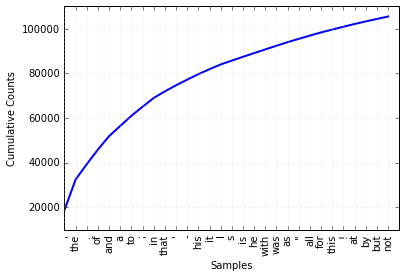

In [10]:
fdist.plot(30, cumulative=True)

From the chart you can see that the top 50 words account for about half of the document. I was also able to calculate this with this:

In [11]:
mosts = fdist.most_common(50)
sum([most[1] for most in mosts])

121725

The other end of this spectrum are words that only appear once in the document, these can be viewed with: `fdist.hapaxes()`

There are about 9000 hapaxes and they are again not useful because the context becomes important for many of them.

Another idea is to see which words are longer than a cutoff length, the book looks at words that are longer than 15 characters with this:

In [12]:
V = set(text1)
long_words = [w for w in V if len(w) > 15]
sorted(long_words)

['CIRCUMNAVIGATION',
 'Physiognomically',
 'apprehensiveness',
 'cannibalistically',
 'characteristically',
 'circumnavigating',
 'circumnavigation',
 'circumnavigations',
 'comprehensiveness',
 'hermaphroditical',
 'indiscriminately',
 'indispensableness',
 'irresistibleness',
 'physiognomically',
 'preternaturalness',
 'responsibilities',
 'simultaneousness',
 'subterraneousness',
 'supernaturalness',
 'superstitiousness',
 'uncomfortableness',
 'uncompromisedness',
 'undiscriminating',
 'uninterpenetratingly']

The book then says "it is likely that most of these are hapaxes" so I wanted to find that out. I discovered that `set` has a method named `intersection` so I was able to determine the set of the intersection of long words and hapaxes with this:

In [13]:
hapaxes = fdist.hapaxes()
set(long_words).intersection(hapaxes)
len(set(long_words).intersection(hapaxes))

16

So there were 16 words that are both a hapaxe and longer than 15 letters, which were the the missing 8 words that are longer than 15 letters, but not hapaxes?

To discover what these word were, I used another list comprehension:

In [14]:
intersection = set(long_words).intersection(hapaxes)
[word for word in long_words if word not in intersection]

['circumnavigating',
 'superstitiousness',
 'circumnavigation',
 'physiognomically',
 'apprehensiveness',
 'comprehensiveness',
 'simultaneousness',
 'indiscriminately']

Well how often are these words used?

In [15]:
[(word, text1.count(word)) for word in long_words if word not in intersection]

[('circumnavigating', 2),
 ('superstitiousness', 2),
 ('circumnavigation', 2),
 ('physiognomically', 2),
 ('apprehensiveness', 4),
 ('comprehensiveness', 3),
 ('simultaneousness', 2),
 ('indiscriminately', 3)]

The book then asks, what about frequently occurring longer words and suggests occur more than 7 times and longer than 7 letter

In [16]:
sorted(w for w in set(text1) if len(w) > 7 and fdist[w] > 7)[:15]

['American',
 'Atlantic',
 'Bulkington',
 'Canallers',
 'Christian',
 'Commodore',
 'Consider',
 'Fedallah',
 'Greenland',
 'Guernsey',
 'Heidelburgh',
 'Japanese',
 'Jeroboam',
 'Leviathan',
 'Meantime']

In [17]:
len(list(w for w in set(text1) if len(w) > 7 and fdist[w] > 7))

555

These words are really quite interesting and may actually tell us a lot about the book.

### Collocations and Bigrams

A collocation is a series of words that together have a meaning, for example "red wine" or "frisbee golf" since these examples are of two words they are also bigrams - there is a nltk method for bigrams that can be used like so

In [18]:
from nltk import bigrams
list(bigrams(['more', 'is', 'said', 'than', 'done']))

[('more', 'is'), ('is', 'said'), ('said', 'than'), ('than', 'done')]

In order to capture bigrams that are collocations we can use the collocations() function which essentially returns bigrams that occur more often than expected based on the frequency of the individual words.

In [19]:
text1.collocations()

Sperm Whale; Moby Dick; White Whale; old man; Captain Ahab; sperm
whale; Right Whale; Captain Peleg; New Bedford; Cape Horn; cried Ahab;
years ago; lower jaw; never mind; Father Mapple; cried Stubb; chief
mate; white whale; ivory leg; one hand


In [20]:
text4.collocations()

United States; fellow citizens; four years; years ago; Federal
Government; General Government; American people; Vice President; Old
World; Almighty God; Fellow citizens; Chief Magistrate; Chief Justice;
God bless; every citizen; Indian tribes; public debt; one another;
foreign nations; political parties


### Counting Other Things

Word counting is interesting, but you can also count other things. For example, if you want to get the distribution of word lengths you can do this

In [21]:
fdist = FreqDist(len(w) for w in text1)
print(fdist)
fdist

<FreqDist with 19 samples and 260819 outcomes>


FreqDist({1: 47933,
          2: 38513,
          3: 50223,
          4: 42345,
          5: 26597,
          6: 17111,
          7: 14399,
          8: 9966,
          9: 6428,
          10: 3528,
          11: 1873,
          12: 1053,
          13: 567,
          14: 177,
          15: 70,
          16: 22,
          17: 12,
          18: 1,
          20: 1})

I was curious how I could get a sorted list of these values, so I tried sorted:

In [22]:
sorted(fdist)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20]

That was informative (there are no 19 letter words in the corpus), but not what I was after, so I used this list comprehension:

In [23]:
tuple_list = [(val, fdist[val]) for val in list(fdist)]
tuple_list.sort(reverse=True, key=lambda x: x[1])
tuple_list

[(3, 50223),
 (1, 47933),
 (4, 42345),
 (2, 38513),
 (5, 26597),
 (6, 17111),
 (7, 14399),
 (8, 9966),
 (9, 6428),
 (10, 3528),
 (11, 1873),
 (12, 1053),
 (13, 567),
 (14, 177),
 (15, 70),
 (16, 22),
 (17, 12),
 (18, 1),
 (20, 1)]

What was the 20 character word?

In [24]:
[w for w in set(text1) if len(w) == 20]

['uninterpenetratingly']

Then, the book asked the same question and had a much simpler solution - what is the most common word length:

In [25]:
fdist.most_common()

[(3, 50223),
 (1, 47933),
 (4, 42345),
 (2, 38513),
 (5, 26597),
 (6, 17111),
 (7, 14399),
 (8, 9966),
 (9, 6428),
 (10, 3528),
 (11, 1873),
 (12, 1053),
 (13, 567),
 (14, 177),
 (15, 70),
 (16, 22),
 (17, 12),
 (18, 1),
 (20, 1)]

So the most frequent word length is 3, which account for about 50000 words or about 20% of the words in the book.

Here is a list of the commonly used Frequency Distribution functions and what they do:

| Example                       | Description                                                        |
|-------------------------------|--------------------------------------------------------------------|
| `fdist = FreqDist(samples)`   | create a frequency distribution containing the given samples       |
| `fdist[sample] += 1`          | increment the count for this sample                                |
| `fdist['monstrous']`          | count of the number of times a given sample occurred               |
| `fdist.freq('monstrous')`     | frequency of a given sample                                        |
| `fdist.N()`                   | total number of samples                                            |
| `fdist.most_common(n)`        | the n most common samples and their frequencies                    |
| `for sample in fdist:`        | iterate over the samples                                           |
| `fdist.max()`                 | sample with the greatest count                                     |
| `fdist.tabulate()`            | tabulate the frequency distribution                                |
| `fdist.plot()`                | graphical plot of the frequency distribution                       |
| `fdist.plot(cumulative=True)` | cumulative plot of the frequency distribution                      |
| `fdist1` &#124; `= fdist2`    | update `fdist1` with counts from `fdist2`                          |
| `fdist1 < fdist2`             | test if samples in `fdist1` occur less frequently than in `fdist2` |

## Section 4

This section is about python the language again. It shows some the basic operators of equality (==, !=, >, <, >=, <=) and then some string operators, some of which I did not know, so here they are:

| Function          | Meaning                                                              |
|-------------------|----------------------------------------------------------------------|
| `s.startswith(t)` | test if `s` starts with `t`                                          |
| `s.endswith(t)`   | test if `s` ends with `t`                                            |
| `t in s`          | test if `t` is a substring of `s`                                    |
| `s.islower()`     | test if `s` contains cased characters and all are lowercase          |
| `s.isupper()`     | test if `s` contains cased characters and all are uppercase          |
| `s.isalpha()`     | test if `s` is non-empty and all characters in `s` are alphabetic    |
| `s.isalnum()`     | test if `s` is non-empty and all characters in `s` are alphanumeric  |
| `s.isdigit()`     | test if `s` is non-empty and all characters in `s` are digits        |
| `s.istitle()`     | test if `s` contains cased characters and is title cased             |

Here are some examples of the above methods getting used in list comprehensions

In [26]:
sorted(w for w in set(text1) if w.endswith('ableness'))

['comfortableness',
 'honourableness',
 'immutableness',
 'indispensableness',
 'indomitableness',
 'intolerableness',
 'palpableness',
 'reasonableness',
 'uncomfortableness']

In [27]:
sorted(term for term in set(text4) if 'gnt' in term)

['Sovereignty', 'sovereignties', 'sovereignty']

In [28]:
sorted(item for item in set(text6) if item.istitle())[:15]

['A',
 'Aaaaaaaaah',
 'Aaaaaaaah',
 'Aaaaaah',
 'Aaaah',
 'Aaaaugh',
 'Aaagh',
 'Aaah',
 'Aaauggh',
 'Aaaugh',
 'Aaauugh',
 'Aagh',
 'Aah',
 'Aauuggghhh',
 'Aauuugh']

In [29]:
sorted(item for item in set(sent7) if item.isdigit())

['29', '61']

Combining these methods we can ask even better questions, for example:

How many words are there without case sensitivity?

In [30]:
print(len(set(text1)))
print(len(set(word.lower() for word in text1)))

19317
17231


What if we remove punctuation and numeric tokens?

In [31]:
len(set(token.lower() for token in text1 if token.isalpha()))

16948

This section goes into details about if statements and loops and all stuff you have seen before a million times, so I will be very brief.

- End control statements with colons before wrapping to the next line
- if/elif/else
- print accepts a second parameter named "end" which can change the line end to something other than a new line like so print("mouse", end=" ") will print mouse with a space after it but the next print will start on this line.

Section 5

This section is a quick summary of what is to come.

- word sense disambiguation - we gain understanding from context, word often have many meanings
    - serve: help with food or drink; hold an office; put a ball into play
    - dish: plate; course of a meal; communications device
- pronoun resolution - again we understand the pronoun by the context
    - for example:
        - The thieves stole the paintings. They were subsequently sold.
        - The thieves stole the paintings. They were subsequently caught.
        - The thieves stole the paintings. They were subsequently found.
    - defining the "they" above requires finding the antecedent of the pronoun which computers handle with techniques like:
        - anaphora resolution - identifying what a proount refers to
        - semantic role labeling - identifying how the noun phrase relates to the verb.
- Once words can be understood the next steps may be:
    - question answering
        - text or spoken
    - machine translation

Here is a diagram of what is required to do a single question and answer with a machine:
![NLTK-QA-Flow](NLTK-QA-Flow.png)

Another interesting question in NLP is called "Textual Entailment" which is: given some text and a statement, determine if the statement is true from what was in the text. This is actually quite difficult and people do it all the time.